In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [17]:
mnist= tf.keras.datasets.mnist
(train_images,train_labels) , (test_images,test_labels)=mnist.load_data()


train_images.shape :  (60000, 56, 56)


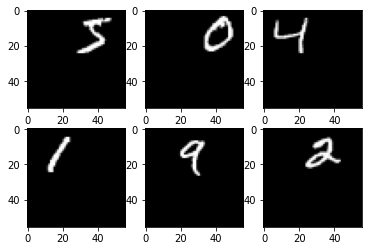

In [18]:
temp=[]
for i in range(len(train_images)):
    (x,y) = (0,random.randint(0,28))
    temp_img= np.array([[ 0 for i in range(56)] for j in range(56)]) 
    temp_img[x:x+28 , y:y+28] += train_images[i]
    temp.append(temp_img)
    
train_images=np.array(temp)
print('train_images.shape : ',train_images.shape)
train_images = train_images.reshape((60000,56,56,1))
train_images = train_images/255
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(train_images[i],cmap='gray')
plt.show()


test_images.shape :  (10000, 56, 56)


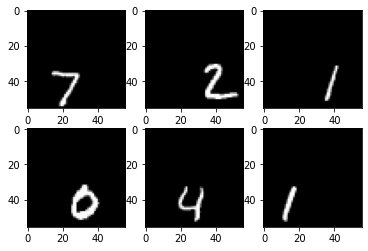

In [19]:
temp=[]
for i in range(len(test_images)):
    (x,y) = (28,random.randint(0,28))
    temp_img= np.array([[ 0 for i in range(56)] for j in range(56)]) 
    temp_img[x:x+28 , y:y+28] += test_images[i]
    temp.append(temp_img)
    
test_images=np.array(temp)
print('test_images.shape : ',test_images.shape)
test_images = test_images.reshape((10000,56,56,1))
test_images = test_images/255

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(test_images[i],cmap='gray')
plt.show()

In [13]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(128,3,input_shape=(56,56,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation= 'relu'))
model.add(tf.keras.layers.Dense(128,activation= 'relu'))
model.add(tf.keras.layers.Dense(10))


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 54, 54, 128)       1280      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_3 (Dense)             (None, 256)              

In [14]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
epochs=5
batchSize=64

model.compile(loss=loss,optimizer=optim,metrics=metrics)
model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs,shuffle=True)



Epoch 1/5
938/938 [==============================] - 6s 6ms/step - loss: 0.2259 - accuracy: 0.9279
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0622 - accuracy: 0.9801
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0380 - accuracy: 0.9876
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0265 - accuracy: 0.9912
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0201 - accuracy: 0.9934


In [15]:
model.evaluate(test_images,test_labels,batchSize)

157/157 [==============================] - 1s 3ms/step - loss: 9.3946 - accuracy: 0.0140


[9.39455509185791, 0.014000000432133675]

In [ ]:
pred_model=tf.keras.models.Sequential()
pred_model.add(model)
pred_model.add(tf.keras.layers.Softmax())

cnt =random.randint(100)

predtions= pred_model(test_images)
pred=predtions[cnt]
label= np.argmax(pred)

# print pred + Image
plt.imshow(test_images[cnt],cmap='gray')
print("Prediction : ",label)



313/313 [==============================] - 5s 1ms/step


<AxesSubplot:>

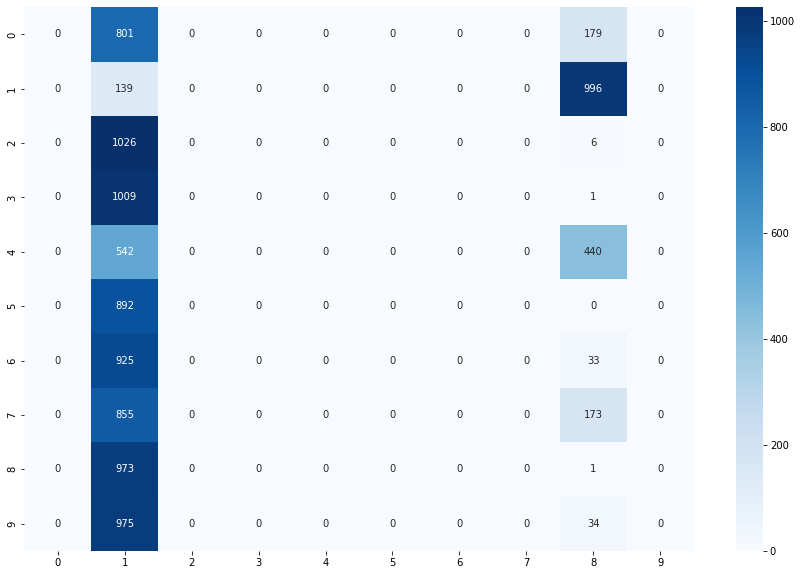

In [21]:
y_pred = np.argmax(pred_model.predict(test_images), axis=1)
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

conf_matrix = pd.DataFrame(confusion_matrix(test_labels, y_pred), columns=labels, index=labels)
plt.figure(figsize=(15,10))  
sb.heatmap(conf_matrix, annot=True, fmt="d",cmap="Blues")